# Sample registration of an image to patterns

Since thre is still an deformation among input images and its representation we look for a descriptive transformations...

In [1]:
%matplotlib inline
import time
import scipy
import numpy as np
from skimage import draw
import matplotlib.pylab as plt

from bpdl import dataset_utils as tl_data
from bpdl import registration as tl_reg

## Input images

In [2]:
# STATIC IMAGE - from atlas
img_static = np.zeros((128, 128), dtype=int)
x, y = draw.ellipse(40, 60, 20, 50, shape=img_static.shape)
img_static[x, y] = 1
x, y = draw.ellipse(90, 70, 30, 40, shape=img_static.shape)
img_static[x, y] = 1
# MOVING IMAGE - sensed
img_moving = np.zeros(img_static.shape, dtype=float)
x, y = draw.ellipse(70, 60, 50, 40, shape=img_moving.shape)
img_moving[x, y] = 1
img_moving = tl_data.image_transform_binary2fuzzy(img_moving, coef=0.2)

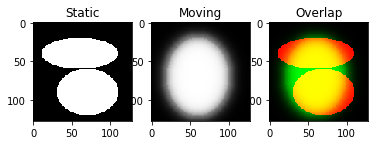

In [3]:
plt.subplot(1, 3, 1), plt.imshow(img_static, cmap=plt.cm.Greys_r), plt.title('Static')
plt.subplot(1, 3, 2), plt.imshow(img_moving, cmap=plt.cm.Greys_r), plt.title('Moving')
im_overlap = np.rollaxis(np.array([img_static, img_moving, np.zeros(img_static.shape)]), 0, 3)
_= plt.subplot(1, 3, 3), plt.imshow(im_overlap), plt.title('Overlap')

In [4]:
def showregist_overlap(img_warped, img_static, img_moving):
    _= plt.subplot(1, 3, 1), plt.imshow(img_warped), plt.title('Warped')
    im_overlap = np.rollaxis(np.array([img_static, img_warped, np.zeros(img_static.shape)]), 0, 3)
    _= plt.subplot(1, 3, 2), plt.imshow(im_overlap), plt.title('W-S (to goal)')
    im_overlap = np.rollaxis(np.array([img_moving, img_warped, np.zeros(img_static.shape)]), 0, 3)
    _= plt.subplot(1, 3, 3), plt.imshow(im_overlap), plt.title('W-M (from init.)')

## Symmetric Diffeomorphic Registration

('demons took:', 0.26030898094177246)


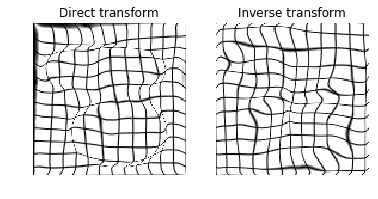

In [11]:
params = tl_reg.DEAMONS_PARAMS

t = time.time()
img_warped, mapping = tl_reg.register_demons_sym_diffeom(img_moving, img_static, smooth_sigma=1, params=params)
print ('demons took:', time.time() - t)

from dipy.viz import regtools
_= regtools.plot_2d_diffeomorphic_map(mapping, 10)

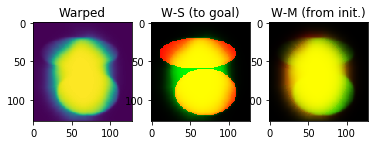

In [12]:
showregist_overlap(img_warped, img_static, img_moving)

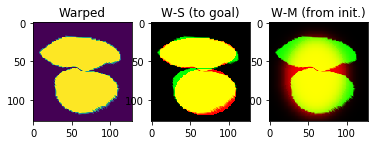

In [13]:
img_warped = mapping.transform_inverse(img_static, 'linear')
showregist_overlap(img_warped, img_static, img_moving)